In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Cargar datos
raw_data_17 = pd.read_csv('Data/nac2017.csv', encoding='latin')
raw_data_18 = pd.read_csv('Data/nac2018.csv', encoding='latin')
raw_data_21 = pd.read_csv('Data/nac2021.csv', encoding='latin')
raw_data_22 = pd.read_csv('Data/nac2022.csv', encoding='latin')

C:\Users\danie\AppData\Local\Temp\ipykernel_3788\3193693375.py:5: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_data_22 = pd.read_csv('Data/nac2022.csv', encoding='latin')


In [3]:
raw_data_21 = raw_data_21.drop(columns="TIPOFORMULARIO")
raw_data_22 = raw_data_22.drop(columns="TIPOFORMULARIO")

In [4]:
raw_data_tot = pd.concat([raw_data_17, raw_data_18, raw_data_21, raw_data_22], ignore_index=True)

In [5]:
raw_data_tot = raw_data_tot.drop(columns=['ATEN_PAR','T_GES_AGRU_CIE','IDPERTET','IDPERTET','CODPRES','N_HIJOSV','IDCLASADMI','ULTCURMAD','ULTCURPAD','PROFESION','EDAD_PADRE','NIV_EDUP'])

In [6]:
# Información de los datos
raw_data_tot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2496358 entries, 0 to 2496357
Data columns (total 27 columns):
 #   Column      Dtype  
---  ------      -----  
 0   COD_DPTO    int64  
 1   COD_MUNIC   int64  
 2   AREANAC     int64  
 3   SIT_PARTO   int64  
 4   OTRO_SIT    object 
 5   SEXO        int64  
 6   PESO_NAC    int64  
 7   TALLA_NAC   int64  
 8   ANO         int64  
 9   MES         int64  
 10  T_GES       int64  
 11  NUMCONSUL   int64  
 12  TIPO_PARTO  int64  
 13  MUL_PARTO   int64  
 14  APGAR1      int64  
 15  APGAR2      int64  
 16  IDHEMOCLAS  int64  
 17  IDFACTORRH  int64  
 18  EDAD_MADRE  int64  
 19  EST_CIVM    int64  
 20  NIV_EDUM    int64  
 21  CODPTORE    float64
 22  CODMUNRE    float64
 23  AREA_RES    float64
 24  FECHA_NACM  object 
 25  N_EMB       int64  
 26  SEG_SOCIAL  int64  
dtypes: float64(3), int64(22), object(2)
memory usage: 514.2+ MB


In [7]:
raw_data_tot.to_csv('Data/nacimientos.csv', index=False, encoding='latin')

Descripción variables numéricas:

In [8]:
# Descripción variables numéricas
pd.set_option('display.max_columns', None) #Si hay muchas columnas
raw_data_tot.describe()

,COD_DPTO,COD_MUNIC,AREANAC,SIT_PARTO,SEXO,PESO_NAC,TALLA_NAC,ANO,MES,T_GES,NUMCONSUL,TIPO_PARTO,MUL_PARTO,APGAR1,APGAR2,IDHEMOCLAS,IDFACTORRH,EDAD_MADRE,EST_CIVM,NIV_EDUM,CODPTORE,CODMUNRE,AREA_RES,N_EMB,SEG_SOCIAL
count,2.496358e+06,2.496358e+06,2.496358e+06,2.496358e+06,2.496358e+06,2.496358e+06,2.496358e+06,2.496358e+06,2.496358e+06,2.496358e+06,2.496358e+06,2.496358e+06,2.496358e+06,2.496358e+06,2.496358e+06,2.496358e+06,2.496358e+06,2.496358e+06,2.496358e+06,2.496358e+06,2.475772e+06,2.475771e+06,2.475949e+06,2.496358e+06,2.496358e+06
mean,3.395904e+01,1.599742e+02,1.037415e+00,1.026987e+00,1.488008e+00,5.729728e+00,4.597328e+00,2.019397e+03,6.604715e+00,3.792609e+00,6.525644e+00,1.486525e+00,1.025941e+00,9.838965e+00,1.097188e+01,2.553286e+00,1.201564e+00,3.795618e+00,2.584548e+00,8.127882e+00,3.390409e+01,2.475646e+02,1.390003e+00,2.184084e+00,1.846691e+00
std,2.658002e+01,2.588075e+02,3.293695e-01,2.797828e-01,5.000670e-01,1.095625e+00,6.580011e-01,2.052044e+00,3.432526e+00,4.811532e-01,6.545008e+00,5.704861e-01,2.862045e-01,1.191445e+01,1.174758e+01,1.261855e+00,1.122199e+00,2.494139e+00,2.181694e+00,1.771993e+01,2.631432e+01,2.965173e+02,7.471153e-01,3.322142e+00,9.989299e-01
min,5.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.017000e+03,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,5.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.100000e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,5.000000e+00,4.000000e+00,2.017000e+03,4.000000e+00,4.000000e+00,5.000000e+00,1.000000e+00,1.000000e+00,8.000000e+00,9.000000e+00,2.000000e+00,1.000000e+00,3.000000e+00,1.000000e+00,3.000000e+00,1.100000e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
50%,2.300000e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,6.000000e+00,5.000000e+00,2.018000e+03,7.000000e+00,4.000000e+00,6.000000e+00,1.000000e+00,1.000000e+00,8.000000e+00,1.000000e+01,3.000000e+00,1.000000e+00,4.000000e+00,1.000000e+00,4.000000e+00,2.300000e+01,8.100000e+01,1.000000e+00,2.000000e+00,2.000000e+00
75%,5.400000e+01,2.690000e+02,1.000000e+00,1.000000e+00,2.000000e+00,6.000000e+00,5.000000e+00,2.021000e+03,1.000000e+01,4.000000e+00,8.000000e+00,2.000000e+00,1.000000e+00,9.000000e+00,1.000000e+01,3.000000e+00,1.000000e+00,5.000000e+00,5.000000e+00,7.000000e+00,5.400000e+01,4.830000e+02,1.000000e+00,3.000000e+00,2.000000e+00
max,9.900000e+01,9.800000e+02,9.000000e+00,9.000000e+00,3.000000e+00,9.000000e+00,9.000000e+00,2.022000e+03,1.200000e+01,9.000000e+00,9.900000e+01,9.000000e+00,9.000000e+00,9.900000e+01,9.900000e+01,9.000000e+00,9.000000e+00,9.900000e+01,9.000000e+00,9.900000e+01,9.900000e+01,9.800000e+02,9.000000e+00,9.900000e+01,9.000000e+00


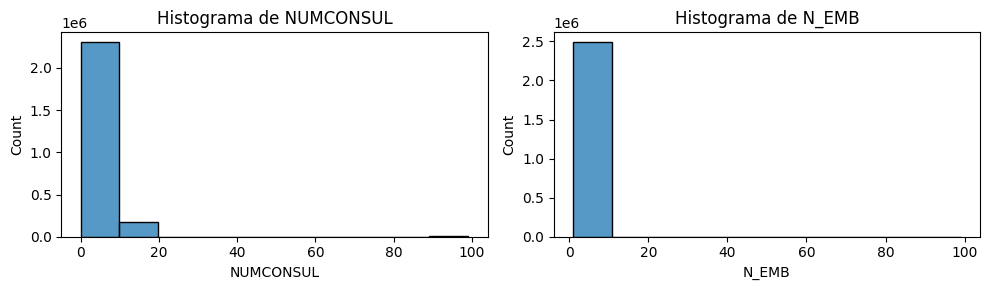

In [9]:
# Gráficos para variables numéricas
features_num = ['NUMCONSUL','N_EMB']

plt.figure(figsize=(10, 3))
for i, feature in enumerate(features_num):
    plt.subplot(1, 2, i+1)  # Crear subplots en una cuadrícula de 2 filas y 4 columnas
    sns.histplot(data=raw_data_tot, x=feature, kde=False, bins=10)
    plt.title(f'Histograma de {feature}')
    plt.tight_layout()

plt.show()

Descripción de variables categóricas:

In [10]:
# Descripción de Variables categóricas
features_cat = raw_data_tot[['SIT_PARTO','OTRO_SIT','SEXO','PESO_NAC','TALLA_NAC','ANO','MES','T_GES','TIPO_PARTO','MUL_PARTO',
                'APGAR1','APGAR2','IDHEMOCLAS','IDFACTORRH','EDAD_MADRE','EST_CIVM','NIV_EDUM','SEG_SOCIAL']]

otras = ['COD_DPTO','COD_MUNIC','AREANAC','CODPTORE','CODMUNRE','AREA_RES','FECHA_NACM']
for i, feature in enumerate(features_cat):
    print(pd.Series(raw_data_tot[feature]).value_counts())

SIT_PARTO
1    2449252
2      39605
3       5374
9       2127
Name: count, dtype: int64
OTRO_SIT
AMBULANCIA            893
CASA                  520
SIN INFORMACION       260
SIN INFORMACIÓN       255
TAXI                  213
                     ... 
en taxi                 1
En la ambulancia        1
HUEM                    1
Casa de partera         1
casa grande aluucx      1
Name: count, Length: 1595, dtype: int64
SEXO
1    1278378
2    1217717
3        263
Name: count, dtype: int64
PESO_NAC
6    1052146
5     698415
7     422725
4     165329
8      63811
3      43954
9      20862
2      18887
1      10229
Name: count, dtype: int64
TALLA_NAC
5    1412358
4    1036444
3      24393
9      21050
2       1553
6        543
1         17
Name: count, dtype: int64
ANO
2017    656704
2018    649115
2021    616914
2022    573625
Name: count, dtype: int64
MES
9     222329
8     216033
10    214766
12    213063
7     210998
11    209750
5     209337
3     208830
6     203356
1     202844
4   

Distribución de la variable objetivo:

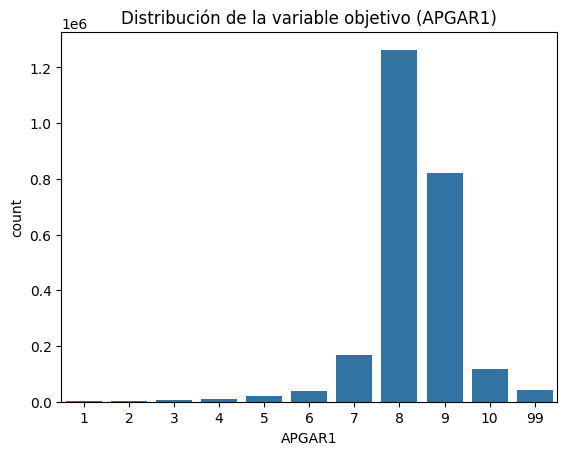

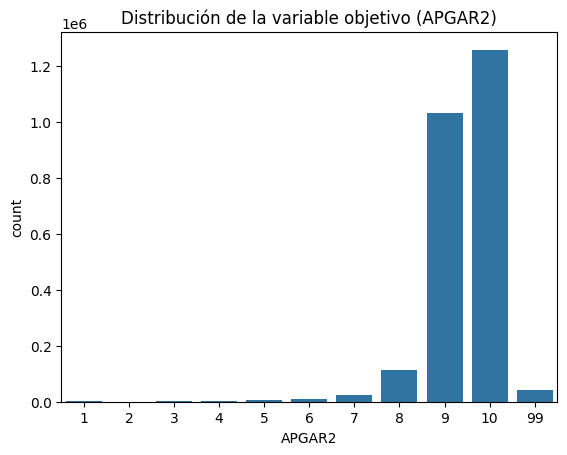

In [11]:
# Categórica
sns.countplot(x='APGAR1', data=raw_data_tot)
plt.title("Distribución de la variable objetivo (APGAR1)")
plt.show()

# Categórica
sns.countplot(x='APGAR2', data=raw_data_tot)
plt.title("Distribución de la variable objetivo (APGAR2)")
plt.show()

### 2.2. Calidad de datos

**Consistencia:** hablar de si los tipos de datos encontrados son consistentes con los del diccionario de datos. Los datos deben ser coherentes con las descripciones recibidas.

**Unicidad:** Hablar de registros duplicados. Cada registro debe ser único, y la presencia de datos duplicados indica un problema de calidad. 

**Completitud:** Hablar de valores faltantes. Es importante que toda la información necesaria esté disponible y no haya campos obligatorios vacíos o incompletos.

**Validez:** Hablar de valores atípicos. Los datos deben cumplir con las reglas del negocio o estar dentro de rangos válidos.
Ejemplo: Si en una columna de edad se encuentran valores negativos o extremadamente altos (como 200 años), estos serían considerados valores atípicos o no válidos.

#### Registros duplicados:

In [8]:
duplicates = raw_data_tot.duplicated(keep = False).sum()
print(f'Registros duplicados en el conjunto de datos: {duplicates}')

Registros duplicados en el conjunto de datos: 23518


#### Valores faltantes:


Valores faltantes en el conjunto de datos:
 COD_DPTO            0
COD_MUNIC           0
AREANAC             0
SIT_PARTO           0
OTRO_SIT      2490984
SEXO                0
PESO_NAC            0
TALLA_NAC           0
ANO                 0
MES                 0
T_GES               0
NUMCONSUL           0
TIPO_PARTO          0
MUL_PARTO           0
APGAR1              0
APGAR2              0
IDHEMOCLAS          0
IDFACTORRH          0
EDAD_MADRE          0
EST_CIVM            0
NIV_EDUM            0
CODPTORE        20586
CODMUNRE        20587
AREA_RES        20409
FECHA_NACM    1152929
N_EMB               0
SEG_SOCIAL          0
dtype: int64
\Porcentaje de valores faltantes en el conjunto de datos:
 COD_DPTO       0.000000
COD_MUNIC      0.000000
AREANAC        0.000000
SIT_PARTO      0.000000
OTRO_SIT      99.784726
SEXO           0.000000
PESO_NAC       0.000000
TALLA_NAC      0.000000
ANO            0.000000
MES            0.000000
T_GES          0.000000
NUMCONSUL      0.000000
T

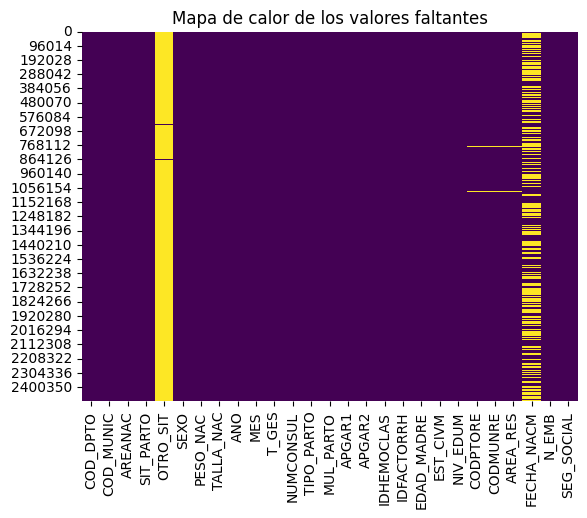

In [13]:
missing_values = raw_data_tot.isnull().sum()
print("\nValores faltantes en el conjunto de datos:\n", missing_values)

# Porcentajes 
missing_values_p = (missing_values / len(raw_data_tot)) * 100
print("\Porcentaje de valores faltantes en el conjunto de datos:\n", missing_values_p)

# Visualización de los valores faltantes
sns.heatmap(raw_data_tot.isnull(), cbar=False, cmap='viridis')
plt.title("Mapa de calor de los valores faltantes")
plt.show()

#### Outliers:

In [14]:
# Porcentaje de outliers
features_outliers = []
print('Número y porcentaje de outliers:')

for column in features_num:
    Q1 = raw_data_tot[column].quantile(0.25)
    Q3 = raw_data_tot[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = raw_data_tot[(raw_data_tot[column] < lower_bound) | (raw_data_tot[column] > upper_bound)]
    percentage = (len(outliers) / len(raw_data_tot[column])) * 100
    
    if percentage > 0:
        features_outliers.append(column)
        
    print(f'{column}: {len(outliers)} | {percentage:.2f}%')

Número y porcentaje de outliers:
NUMCONSUL: 134386 | 5.38%
N_EMB: 34556 | 1.38%


## Limpieza de datos

In [13]:
clean_data = raw_data_tot.copy()

In [ ]:
clean_data=clean_data.drop_duplicates().drop(columns=['OTRO_SIT','AREANAC','MES', 'NUMCONSUL','IDHEMOCLAS', 'IDFACTORRH',
                                'EST_CIVM', 'NIV_EDUM','CODPTORE', 'CODMUNRE', 'AREA_RES'])
clean_data.columns

Index(['COD_DPTO', 'COD_MUNIC', 'SIT_PARTO', 'SEXO', 'PESO_NAC', 'TALLA_NAC',
       'ANO', 'T_GES', 'TIPO_PARTO', 'MUL_PARTO', 'APGAR1', 'APGAR2',
       'EDAD_MADRE', 'FECHA_NACM', 'N_EMB', 'SEG_SOCIAL'],
      dtype='object')

In [ ]:
#datos=clean_data.dropna()

In [23]:
clean_data.shape

(2483285, 16)

In [24]:
clean_data.to_csv('Data/nacimientos_clean.csv', index=False, encoding='latin')

### Datos mapa

In [9]:
import pandas as pd

clean_data = pd.read_csv('Data/nacimientos_clean.csv', sep=',', encoding='latin')

In [10]:
# Cargar el archivo CSV cods con los tipos de datos correctos para las columnas
columnas_str = ['COD_Departamento', 'COD_Municipio']
df_codigos = pd.read_csv('Data/cods_dpto_munic.csv', sep=',', encoding='latin', dtype={col: str for col in columnas_str})
df_codigos.shape

(1122, 4)

In [11]:
# Asegurarse de que datos tenga las columnas COD_DPTO y COD_MUNIC con ceros a la izquierda
clean_data['COD_DPTO'] = clean_data['COD_DPTO'].astype(str).str.zfill(2)
clean_data['COD_MUNIC'] = clean_data['COD_MUNIC'].astype(str).str.zfill(3)

# Crear una columna concatenada en datos
clean_data['COD_COMBINADO'] = clean_data['COD_DPTO'] + clean_data['COD_MUNIC']

In [13]:
# Realizar el merge usando las columnas concatenadas
df_resultado = pd.merge(clean_data, df_codigos, left_on='COD_COMBINADO', right_on='COD_Municipio', how='left')

# Seleccionar las columnas de interés
df_resultado = df_resultado.drop(columns=['COD_Departamento', 'COD_Municipio','COD_DPTO','COD_MUNIC'])

# Guardar el resultado si es necesario
df_resultado.to_csv('Data/nacimientos_full.csv', index=False)

# Ver el resultado
df_resultado.shape

(2483285, 17)